In [3]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn
import matplotlib
import powerlaw
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [4]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(F10t + 'Project/' + experiment)
av_list =  sorted(glob.glob('*av*'))

In [5]:
num = adfn.name_zero('front', 4, 12, 1)
for i in num:
    av_list = sorted(glob.glob('*-' + i + '*BLN*av*'))[:180]
    nnb = np.arange(4, 24)
    bcl = np.arange(0.47, 0.63, 0.02)
    curr_fish = np.zeros((nnb.shape[0], bcl.shape[0])).T

    count=0
    for e in range(curr_fish.shape[0]):
        for x in range(curr_fish.shape[1]):
            curr_av = np.load(av_list[count])
            curr_fish[e][x] = crfn.DCC(curr_av)
            count+=1
    name = adfn.name_template([av_list][0], 'short') 
    np.save(savepath + name + '-DCC-sweep.npy', curr_fish)
    print('DOne ' + str(i))

DOne 04
DOne 05
DOne 06
DOne 07
DOne 08


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


DOne 09
DOne 10
DOne 11
DOne 12


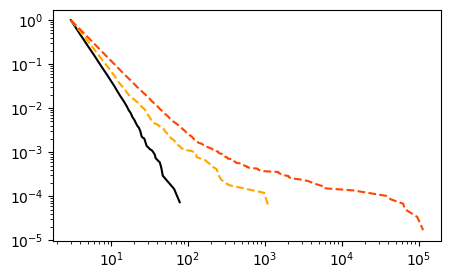

In [2]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

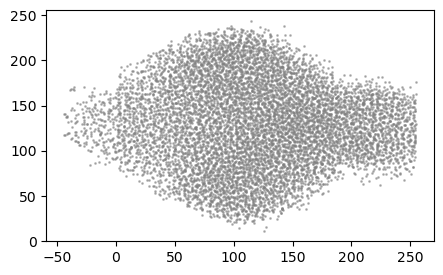

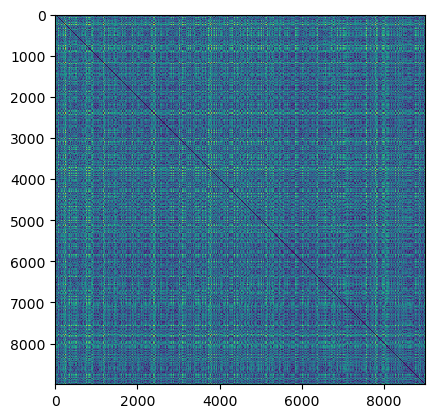

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,3))
nodes = np.load(node[0])
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'grey' , alpha = 0.5)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

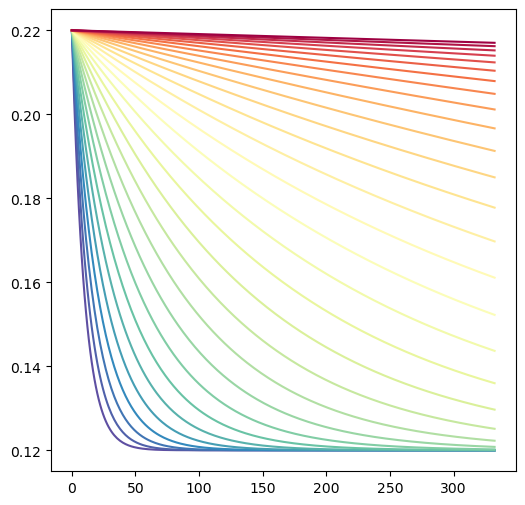

In [4]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, r,s):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights

#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2
#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for r in range(len(r_vals)):
    ax.plot(distance, dist2edge(distance, divisor, r_vals[r], s), c=colors[r])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

In [5]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
sim_time = 400
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value
s = 1.2 #Synaptic weights

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

In [6]:
input_range = np.linspace(5, 100, 20)
input_range

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

In [10]:
k_vals = np.arange(1, 35, 1)
k_vals

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [ ]:
#K PARAMETER
r = 2
thresh = 17
cutoff = 200
for i in range(len(k_vals)):
    k = k_vals[i]
    av_list = list(range(len(input_range)+2))
    av_list[0] = input_range
    av_list[1] = k_vals
    for e in range(len(input_range)):
        av = netfn.ba_netsim(dist).ping(int(k), r, s, divisor, soften, 'directed', 1000, thresh, int(input_range[e]), cutoff)
        av_size = av.av_size
        av_dur = av.av_dur
        sub_list = [av_size, av_dur]
        av_list[e +2] = sub_list
        print('Done r - ' + str(k) + ' input ' + str(e))         
    if len(str(k)) == 1:
        np.save(Fdrop + 'Project/' + experiment + os.sep + 'dynrange_nit_1000_cut200_run-04-r-2_vth-17_k-0' + str(int(k)) + '.npy', av_list)
        
    if len(str(k)) > 1:
        np.save(Fdrop + 'Project/' + experiment + os.sep + 'dynrange_nit_1000_cut200_run-04-r-2_vth-17_k-' + str(int(k)) + '.npy', av_list)


Done r - 1 input 0
Done r - 1 input 1
Done r - 1 input 2
Done r - 1 input 3
Done r - 1 input 4
Done r - 1 input 5
Done r - 1 input 6
Done r - 1 input 7
Done r - 1 input 8
Done r - 1 input 9
Done r - 1 input 10
Done r - 1 input 11
Done r - 1 input 12
Done r - 1 input 13
Done r - 1 input 14
Done r - 1 input 15
Done r - 1 input 16
Done r - 1 input 17
Done r - 1 input 18
Done r - 1 input 19
Done r - 2 input 0
Done r - 2 input 1
Done r - 2 input 2
Done r - 2 input 3
Done r - 2 input 4
Done r - 2 input 5
Done r - 2 input 6
Done r - 2 input 7
Done r - 2 input 8
Done r - 2 input 9
Done r - 2 input 10
Done r - 2 input 11
Done r - 2 input 12
Done r - 2 input 13
Done r - 2 input 14
Done r - 2 input 15
Done r - 2 input 16
Done r - 2 input 17
Done r - 2 input 18
Done r - 2 input 19
Done r - 3 input 0
Done r - 3 input 1
Done r - 3 input 2
Done r - 3 input 3
Done r - 3 input 4
Done r - 3 input 5
Done r - 3 input 6
Done r - 3 input 7
Done r - 3 input 8
Done r - 3 input 9
Done r - 3 input 10
Done r - 3

In [12]:
av_list[2:]

[[array([2.200000e+01, 9.693000e+03, 1.000000e+01, 6.400000e+01,
         6.790000e+02, 5.000000e+00, 2.000000e+00, 2.000000e+00,
         4.500000e+01, 4.320000e+02, 6.000000e+00, 1.800000e+01,
         1.100000e+01, 2.000000e+00, 2.198060e+05, 5.000000e+00,
         9.800000e+01, 5.400000e+01, 8.000000e+00, 2.600000e+01,
         2.000000e+00, 4.000000e+00, 9.200000e+01, 2.000000e+00,
         1.600000e+01, 1.600000e+01, 4.100000e+01, 2.000000e+00,
         1.400000e+01, 2.635000e+03, 5.900000e+01, 1.000000e+01,
         1.300000e+01, 5.000000e+00, 9.000000e+00, 1.800000e+01,
         7.000000e+00, 3.300000e+01, 6.400000e+01, 3.000000e+00,
         9.000000e+00, 1.430200e+04, 4.000000e+00, 5.000000e+00,
         8.000000e+00, 9.000000e+00, 4.800000e+02, 2.340000e+02,
         7.000000e+00, 7.000000e+00, 7.000000e+00, 1.000000e+01,
         2.000000e+00, 3.200000e+01, 1.200000e+01, 4.000000e+00,
         2.500000e+01, 3.000000e+00, 2.700000e+01, 2.000000e+00,
         2.000000e+00, 1.